In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

# 필터의 가중치

- 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할

    - 예) 물건의 테두리같은 특징적인 부분의 가중치는 높고 그 외 영역의 가중치가 낮게

In [2]:
# 저장해둔 cnn모델 불러오기
model = keras.models.load_model("./model/best-cnn-model.keras")

In [34]:
# 모델 층 확인 (맛집 레시피)
model.layers

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_4, built=True>]

In [5]:
# 첫 번째 합성곱 층의 가중치 확인
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [7]:
print(conv.weights[0]) # 와 멋진... 몰라용 이거 어케암

<Variable path=conv2d_2/kernel, shape=(3, 3, 1, 32), dtype=float32, value=[[[[ 0.37485716 -0.01079045 -0.10062481  0.3028505   0.10082452
     0.16738437 -0.03282628 -0.29376125  0.06703161  0.13820046
     0.03698269  0.01839976 -0.09255183  0.01875701 -0.40457454
     0.2832418  -0.03577394 -0.26127675 -0.00584276  0.09610841
     0.13579006  0.03202721 -0.43506718  0.24686913  0.12598114
    -0.20475017 -0.11056218 -0.00531629  0.2380969  -0.19907685
     0.00280459 -0.08444784]]

  [[ 0.02975248 -0.51626027  0.0740571  -0.23467913  0.10429672
     0.11833758  0.39184138  0.41526628  0.14901991  0.23751453
     0.16542082  0.00178445  0.04388937  0.1058185  -0.26869202
    -0.185334    0.07548994  0.01899348  0.11016816 -0.14682104
    -0.04233945 -0.04739216 -0.38204312  0.08771369  0.1005814
     0.01326916  0.3049012   0.09479082  0.21151206  0.01450991
    -0.04062641  0.4578908 ]]

  [[-0.41358423 -0.5347001   0.01871776 -0.05208081 -0.17668924
    -0.2872932  -0.01902057 -0.07

- 편집은 가능하나 무슨 특징을 넣을지 어떻게 넣을지...모르기때문에 뭐 그렇다

- conv.weights[0]
    - 가중치
    - 가중치의 크기
        - 커널의 크기 : (3, 3, 1)
        - 필터의 개수 : 32
- conv.weights[1]
    - 절편의 개수 = 필터의 개수

In [9]:
# 원할한 게산을 위해 넘파이 배열로 변환
conv_weights = conv.weights[0].numpy()

In [11]:
# 훈련이 잘되었다~ 라는 것을 알수있다
print(conv_weights.mean(), conv_weights.std())

-0.013467267 0.22381225


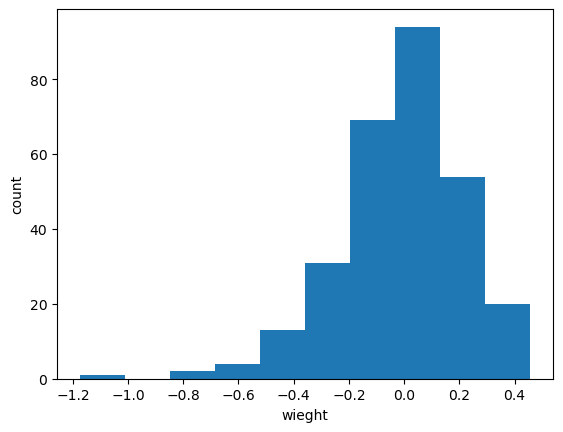

In [12]:
# 가중치 히스토그램

plt.figure()
plt.hist(conv_weights.reshape(-1, 1)) # hist 함수는 데이터를 1차원 배열로 전달해야함

plt.xlabel("weight")
plt.ylabel("count")

plt.show()

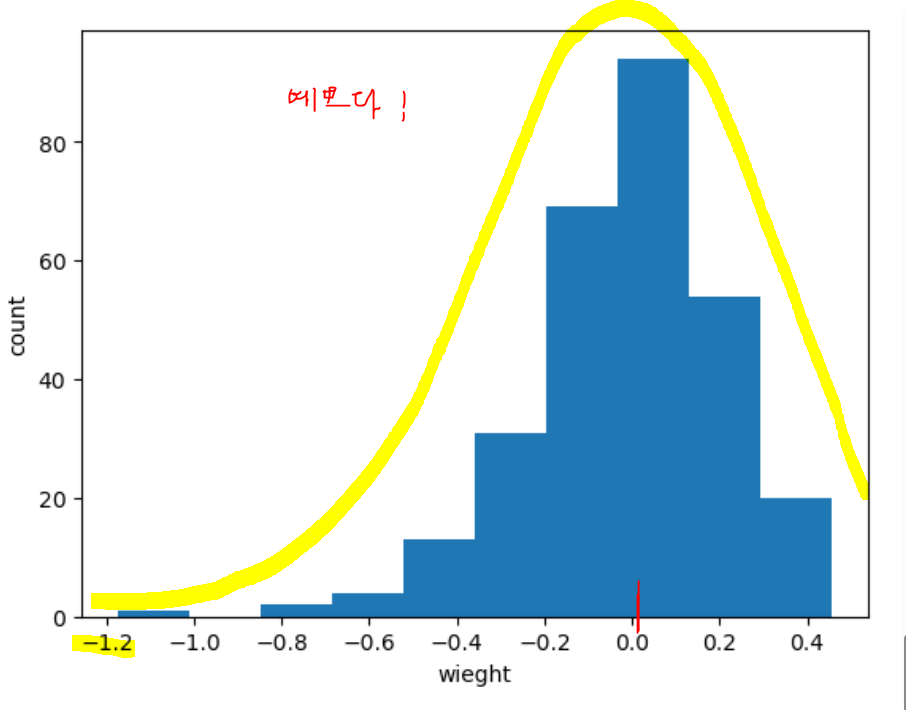

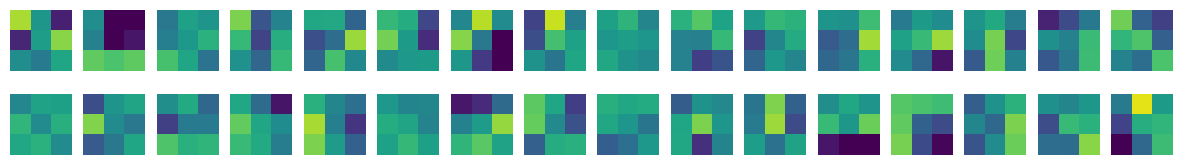

In [15]:
# 32개의 커널을 모두 시각화
fig, axs = plt.subplots(2, 16, figsize = (15, 2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i,j].axis("off")

plt.show()

- 밝은 부분이 높은 값
    - 가중치가 높은 영역에 이미지가 겹치면 크게 활성화됨
        - 예) 오른쪽 세로롤 한 줄의 가중치가 높다면 오른쪽에 놓인 직선을 만나면 크게 활성화

- i : 행 인덱스 (0 ~ 1)

- j : 열 인덱스 (0~ 15)
    - conv_weights[:, :, 0, 0]부터 conv_weights[:, :, 0, 31]
 
- imshow()

    - 배열의 최댓값과 최솟값으로 픽셀의 강도를 표현
    
        - 배열의 최댓값은 가장 밝은 색으로
        
        - 배열의 최솟값은 가장 어두운 색으로 표현

- vmax, vmin
    - 컬러맵으로 표현할 색의 범위 지정

# 훈련하지 않은 합성곱 신경망과 비교

In [18]:
no_training_model = keras.Sequential()
no_training_model.add(keras.Input(shape = (28,28,1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation="relu", padding = "same"))

In [19]:
# 훈련하지 않은 합성곱 층의 가중치를 저장
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [20]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.008195106 0.083939716


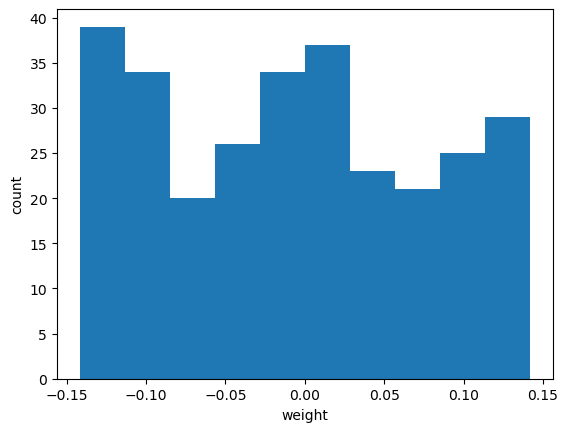

In [21]:
# 가중치 히스토그램

plt.figure()
plt.hist(no_training_weights.reshape(-1, 1)) # hist 함수는 데이터를 1차원 배열로 전달해야함

plt.xlabel("weight")
plt.ylabel("count")

plt.show()

- 대부분의 가중치가 -0.15부터 0.15까지 고르게 분포함
- 텐서플로에서 **가중치를 초기화할 때 균등 분포에서 랜덤하게 값을 선택**하기 때문

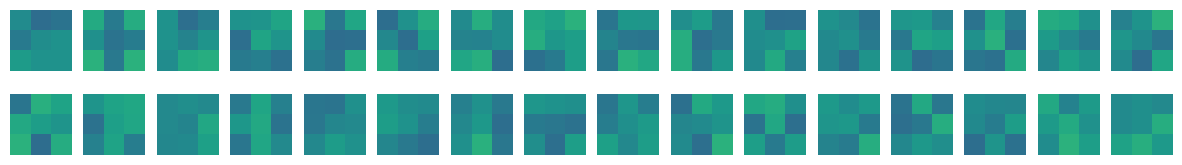

In [23]:
# 32개의 커널을 모두 시각화
fig, axs = plt.subplots(2, 16, figsize = (15, 2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i,j].axis("off")

plt.show()

- 이쁜 도장들... 특징은 보이지 않는다...

# 케라스의 함수형 API

- Sequential 클래스 : 층을 차례대로 쌓은 단순한 모델을 구성

- 복잡한 모델은 구성하기 힘들기 때문에 함수형 API(functional API)를 사용

- 케라스의 Model 클래스를 사용하여 모델을 생성

- layers 객체를 함수처럼 호출할 수 있음

In [24]:
# Sequential 는 보행기다
# 원래는 그냥 걸어다니는게 정상이죠?

<hr>

#### 함수형 API 로 다층 퍼셉트론 모델 구현 예제

In [25]:
inputs = keras.Input(shape = (784,))
dense1 = keras.layers.Dense(100, activation= "sigmoid")
dense2 = keras.layers.Dense(10, activation= "softmax")

In [26]:
# 은닉층 호출
hidden = dense1(inputs)

- inputs 를 Dense층에 통과시킨 후 출력값을 hidden 에 저장

In [28]:
# 출력층 호출
outputs = dense2(hidden)

In [29]:
# Model 클래스로 inputs 와 outputs 를 연결
test_model = keras.Model(inputs, outputs)

In [30]:
test_model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

#### 예제끝

<hr>

## 합성곱 신경망 모델 특성맵 시각화

- 함수형 API를 이용해 첫 번째 합성곱 층의 출력(특성맵)시각화

In [32]:
# 합성곱 모델의 입력층 !!!!!!!
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer_1>]


In [36]:
# 합성곱층과 입력층을 함수형 API 로 연결
conv_acti = keras.Model(model.inputs, model.layers[0].output)

In [41]:
conv_acti.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

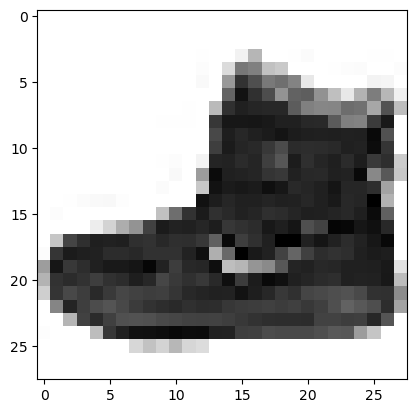

In [40]:
plt.figure()
plt.imshow(x_train[0], cmap = "gray_r")
plt.show()

In [42]:
# 위의 데이터를 첫 번째 합성곱층에 통과
inputs = x_train[[0]].reshape(-1, 28, 28, 1) / 255

In [43]:
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [44]:
print(feature_maps.shape)

(1, 28, 28, 32)


- 세임 패딩과 32개의 필터를 사용한 합성곱층의 출력이기 때문에 (28, 28, 32)

- 첫 번째 차원은 배치 차원
    - 샘플 하나만 입력했기 때문에 1

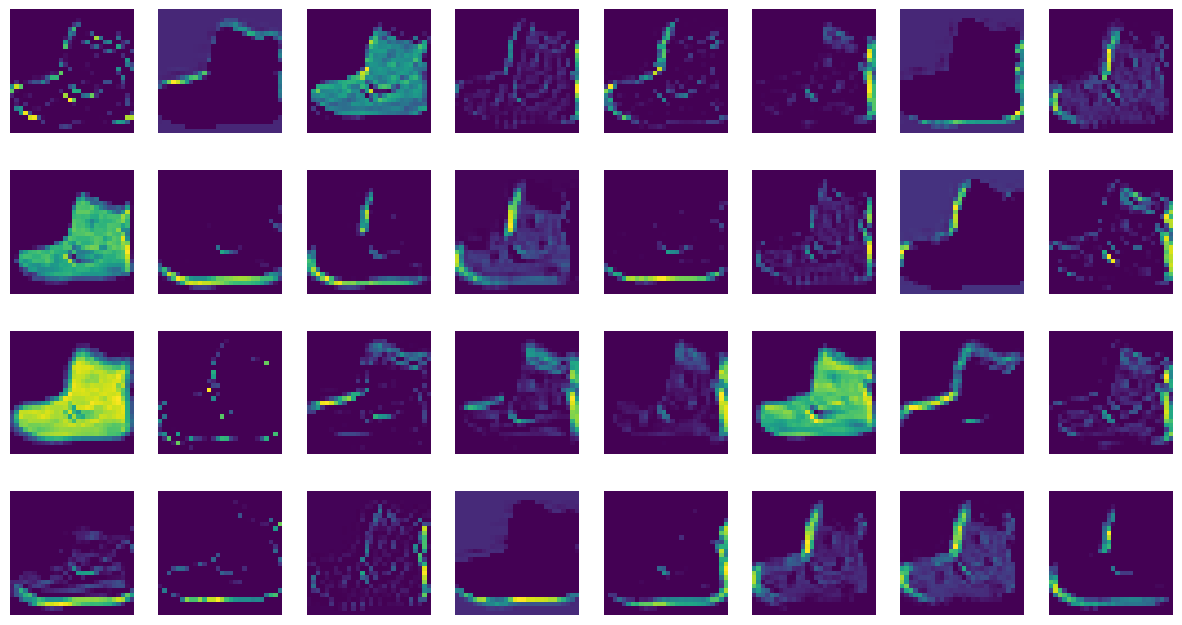

In [45]:
# 32개의 특성맵 시각화 ( 32개의 커널을 지나친 후의 결과물 )

fig, axs = plt.subplots(4, 8, figsize= (15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:, i * 8 + j])
        axs[i, j].axis("off")


plt.show()

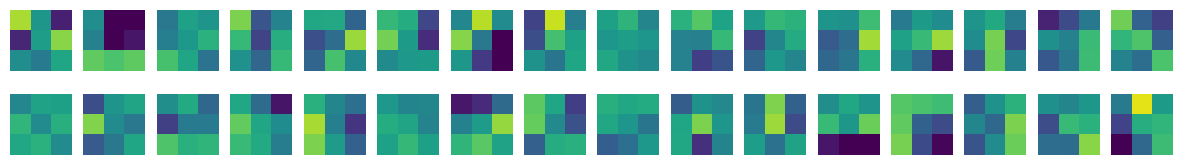

In [46]:
 # 32개의 커널을 모두 시각화
fig, axs = plt.subplots(2, 16, figsize = (15, 2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i,j].axis("off")

plt.show()

- 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분들을 시각화
    - 필터가 수직선을 감지한다면 수직선 부분이 강하게 활성화
    - 전체적으로 모두 감지하는 필터는 아이템의 전체를 활성화
    - 전체적으로 음수값인 필터는 배경과 같은 0 에 가까운 값과 곱해지면 작은 음수, 큰 수가 곱해지면 큰 음수가 됨
        - 배경을 잘 활성화 함

In [47]:
# 두 번째 합성곱 층의 특성맵 확인
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [48]:
feature_maps = conv2_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [49]:
print(feature_maps.shape)

(1, 14, 14, 64)


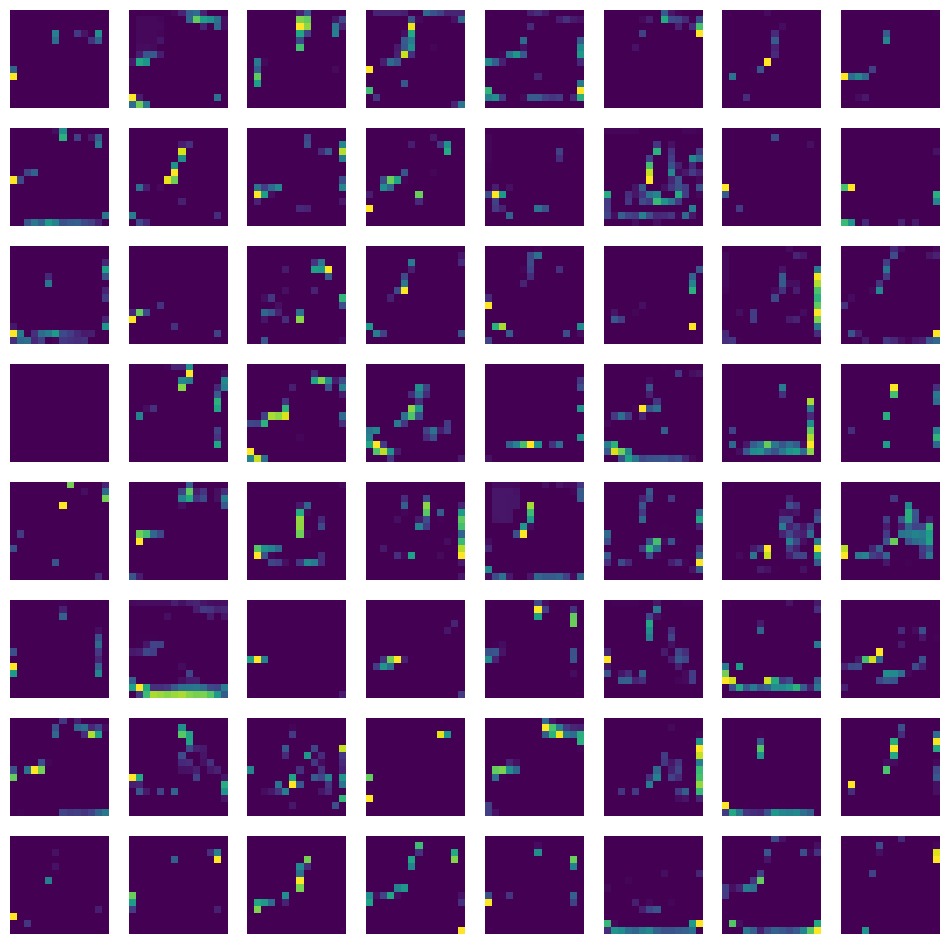

In [50]:
# 32개의 특성맵 시각화 ( 32개의 커널을 지나친 후의 결과물 )

fig, axs = plt.subplots(8, 8, figsize= (12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:, i * 8 + j])
        axs[i, j].axis("off")


plt.show()

- 특성맵을 시각적으로 이해하기 난해함
    - 합성곱층을 많이 쌓을수록 심해짐
    - 앞부분의 합성곱층은 이미지의 시각적인 정보 감지
    - 뒷부분의 합성곱층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보 학습

### conv 와 pool 의 output 의 차이를 알아보자

## 풀링 결과 물 비교

In [52]:
pool_model = keras.Model(model.inputs, model.layers[1].output)

In [53]:
pool_feature_maps = pool_model.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [54]:
print(pool_feature_maps.shape)

(1, 14, 14, 32)


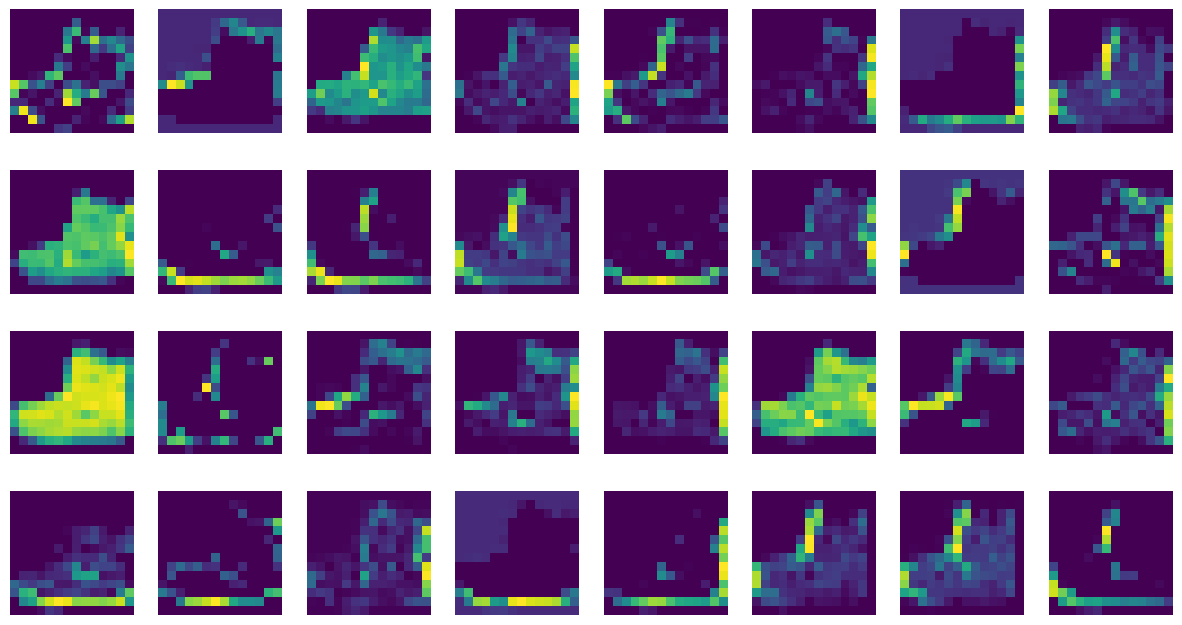

In [58]:
# 32개의 특성맵 시각화 ( 32개의 커널을 지나친 후의 결과물 )

fig, axs = plt.subplots(4, 8, figsize= (15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(pool_feature_maps[0,:,:, i * 8 + j])
        axs[i, j].axis("off")


plt.show()

- 화질 그지가 되었다
- 픽셀이 커졌음 ㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇ
- 학습의 효율은 높아져욘~!!!